<a href="https://colab.research.google.com/github/Ramanarayanan/DeepLearningAndGenerativeAi/blob/main/Attention_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Word Embeddings:
The: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615]
quick: [0.60111501 0.70807258 0.02058449 0.96990985 0.83244264 0.21233911
 0.18182497 0.18340451]
brown: [0.30424224 0.52475643 0.43194502 0.29122914 0.61185289 0.13949386
 0.29214465 0.36636184]
fox: [0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041
 0.60754485 0.17052412]
jumps: [0.06505159 0.94888554 0.96563203 0.80839735 0.30461377 0.09767211
 0.68423303 0.44015249]
over: [0.12203823 0.49517691 0.03438852 0.9093204  0.25877998 0.66252228
 0.31171108 0.52006802]
the: [0.80744016 0.8960913  0.31800347 0.11005192 0.22793516 0.42710779
 0.81801477 0.86073058]
lazy: [0.0884925  0.19598286 0.04522729 0.32533033 0.38867729 0.27134903
 0.82873751 0.35675333]
dog: [0.28093451 0.54269608 0.14092422 0.80219698 0.07455064 0.98688694
 0.77224477 0.19871568]
A: [0.00552212 0.81546143 0.70685734 0.72900717 0.77127035 0.07404465
 0.35846573 0.11586906]
fast: [0.86310343

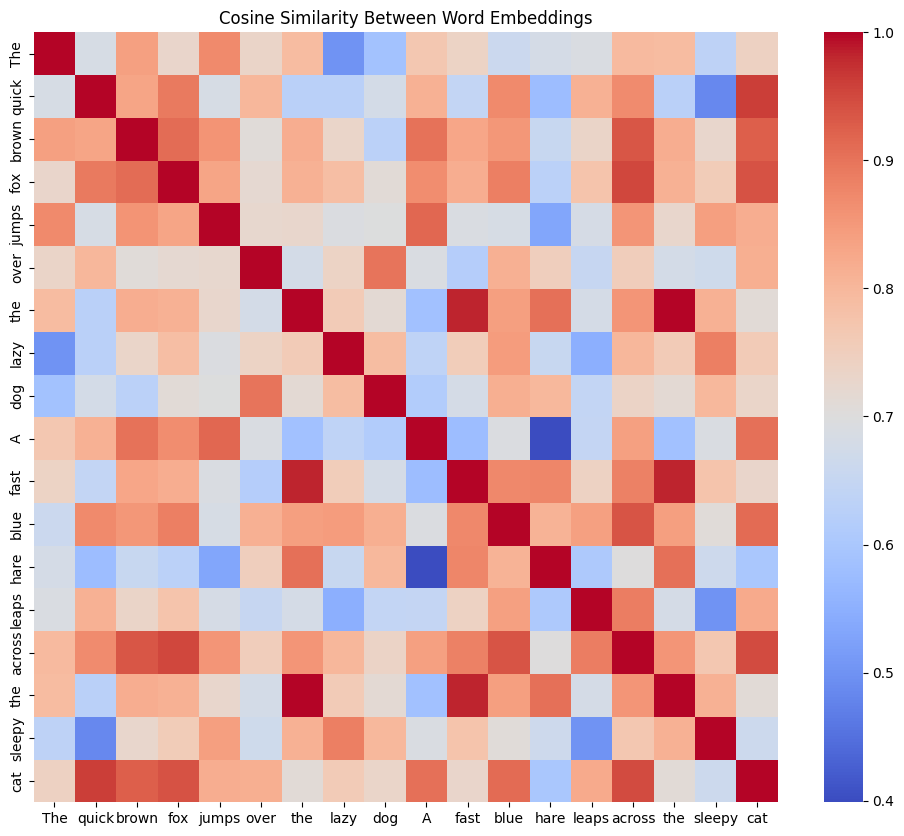


Multi-Head Attention Output:
[[0.41770052 0.54883353 0.45326419 0.66683643 0.67000576 0.53161498
  0.50178738 0.5156121 ]
 [0.41960628 0.52973286 0.44289621 0.69268535 0.66975404 0.53811927
  0.52027219 0.52539397]
 [0.42716491 0.53695772 0.45699623 0.67679767 0.67608378 0.54538499
  0.4947168  0.51401055]
 [0.40762709 0.5444266  0.44452434 0.68438818 0.67576069 0.53372335
  0.51234014 0.5204951 ]
 [0.42899976 0.52812584 0.4497743  0.67272035 0.67932305 0.54131203
  0.50206911 0.51987168]
 [0.40575563 0.54487609 0.46189137 0.67847469 0.68241419 0.55882358
  0.52150419 0.52573665]
 [0.42229842 0.51698406 0.44292474 0.68750384 0.67643319 0.55058926
  0.49602291 0.51506281]
 [0.43071584 0.51734553 0.45404529 0.67189105 0.67856085 0.55096421
  0.50208743 0.51799054]
 [0.42684519 0.52236729 0.44734553 0.68933297 0.67708141 0.54486557
  0.51651545 0.52299891]
 [0.41963014 0.52822685 0.44350508 0.69013916 0.66970572 0.52858603
  0.49741861 0.51630822]
 [0.43460778 0.51193885 0.44719596 0.671

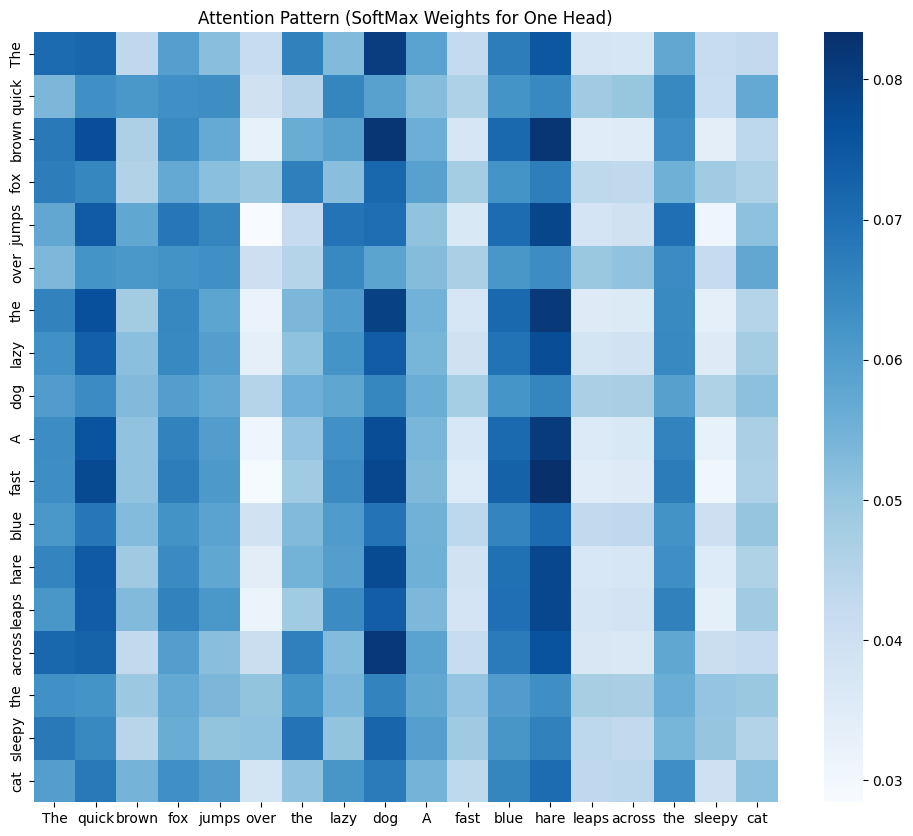


Explanation of Multi-Head Attention:
- Multi-head attention uses multiple sets of Q, K, and V matrices (one per head).
- Each head captures different relationships in the data.
- Attention is computed independently for each head, and their outputs are concatenated.
- This mechanism allows the model to focus on diverse aspects of the input simultaneously.

Formulas:
1. Attention_Score[i][j] = Q[i] . K[j]^T
2. Attention_Weights[i][j] = exp(Attention_Score[i][j]) / sum(exp(Attention_Score[i]))
3. Output[i] = sum(Attention_Weights[i][j] * V[j] for all j)



In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from scipy.special import softmax

# Step 1: Define multiple sample sentences
sentences = [
    "The quick brown fox jumps over the lazy dog",
    "A fast blue hare leaps across the sleepy cat"
]

# Tokenize words from sentences
words = [word for sentence in sentences for word in sentence.split()]

# Step 2: Create word embeddings (Random initialization for simplicity)
np.random.seed(42)  # For reproducibility
word_embeddings = {word: np.random.rand(8) for word in words}  # 8-d embeddings

# Explain embeddings
print("Word Embeddings:")
for word, embedding in word_embeddings.items():
    print(f"{word}: {embedding}")

# Step 3: Display embeddings as a matrix
embedding_matrix = np.array([word_embeddings[word] for word in words])
print("\nEmbedding Matrix:")
print(embedding_matrix)

# Visualize cosine similarity between embeddings
similarity_matrix = cosine_similarity(embedding_matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_matrix, annot=False, xticklabels=words, yticklabels=words, cmap="coolwarm")
plt.title("Cosine Similarity Between Word Embeddings")
plt.show()

# Step 4: Multi-Head Attention Mechanism
# Define number of heads
num_heads = 4
head_dim = 8 // num_heads  # Assume 8-d embeddings split across heads

# Initialize Q, K, V for each head
Q_heads = [np.random.rand(len(words), head_dim) for _ in range(num_heads)]
K_heads = [np.random.rand(len(words), head_dim) for _ in range(num_heads)]
V_heads = [np.random.rand(len(words), head_dim) for _ in range(num_heads)]

# Perform attention for each head
attention_outputs = []
for i in range(num_heads):
    Q, K, V = Q_heads[i], K_heads[i], V_heads[i]
    attention_scores = np.dot(Q, K.T)  # Dot product Q and K.T
    # Formula: Attention_Score[i][j] = Q[i] . K[j]^T
    attention_weights = softmax(attention_scores, axis=-1)  # Normalize with SoftMax
    # Formula: Attention_Weights[i][j] = exp(Attention_Score[i][j]) / sum(exp(Attention_Score[i]))
    attention_output = np.dot(attention_weights, V)  # Weighted sum of values
    # Formula: Output[i] = sum(Attention_Weights[i][j] * V[j] for all j)
    attention_outputs.append(attention_output)

# Concatenate outputs of all heads
multi_head_output = np.concatenate(attention_outputs, axis=-1)

# Print results
print("\nMulti-Head Attention Output:")
print(multi_head_output)

# Step 5: Visualize attention weights for one head
plt.figure(figsize=(12, 10))
sns.heatmap(attention_weights, annot=False, xticklabels=words, yticklabels=words, cmap="Blues")
plt.title("Attention Pattern (SoftMax Weights for One Head)")
plt.show()

# Step 6: Explanation
print("""
Explanation of Multi-Head Attention:
- Multi-head attention uses multiple sets of Q, K, and V matrices (one per head).
- Each head captures different relationships in the data.
- Attention is computed independently for each head, and their outputs are concatenated.
- This mechanism allows the model to focus on diverse aspects of the input simultaneously.

Formulas:
1. Attention_Score[i][j] = Q[i] . K[j]^T
2. Attention_Weights[i][j] = exp(Attention_Score[i][j]) / sum(exp(Attention_Score[i]))
3. Output[i] = sum(Attention_Weights[i][j] * V[j] for all j)
""")



Word Embeddings:
The: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615]
quick: [0.60111501 0.70807258 0.02058449 0.96990985 0.83244264 0.21233911
 0.18182497 0.18340451]
brown: [0.30424224 0.52475643 0.43194502 0.29122914 0.61185289 0.13949386
 0.29214465 0.36636184]
fox: [0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041
 0.60754485 0.17052412]
jumps: [0.06505159 0.94888554 0.96563203 0.80839735 0.30461377 0.09767211
 0.68423303 0.44015249]
over: [0.12203823 0.49517691 0.03438852 0.9093204  0.25877998 0.66252228
 0.31171108 0.52006802]
the: [0.54671028 0.18485446 0.96958463 0.77513282 0.93949894 0.89482735
 0.59789998 0.92187424]
lazy: [0.0884925  0.19598286 0.04522729 0.32533033 0.38867729 0.27134903
 0.82873751 0.35675333]
dog: [0.28093451 0.54269608 0.14092422 0.80219698 0.07455064 0.98688694
 0.77224477 0.19871568]

Embedding Matrix:
[[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
  0.05808361 0.86617615]

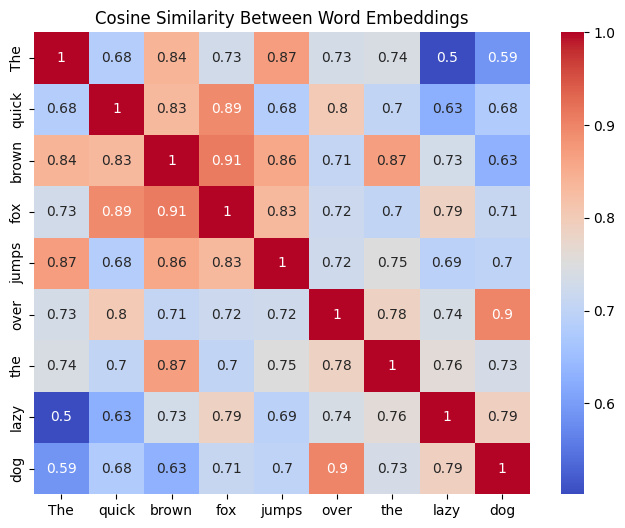


Query Matrix (Q):
[[0.00552212 0.81546143 0.70685734 0.72900717 0.77127035 0.07404465
  0.35846573 0.11586906]
 [0.86310343 0.62329813 0.33089802 0.06355835 0.31098232 0.32518332
  0.72960618 0.63755747]
 [0.88721274 0.47221493 0.11959425 0.71324479 0.76078505 0.5612772
  0.77096718 0.4937956 ]
 [0.52273283 0.42754102 0.02541913 0.10789143 0.03142919 0.63641041
  0.31435598 0.50857069]
 [0.90756647 0.24929223 0.41038292 0.75555114 0.22879817 0.07697991
  0.28975145 0.16122129]
 [0.92969765 0.80812038 0.63340376 0.87146059 0.80367208 0.18657006
  0.892559   0.53934224]
 [0.80744016 0.8960913  0.31800347 0.11005192 0.22793516 0.42710779
  0.81801477 0.86073058]
 [0.00695213 0.5107473  0.417411   0.22210781 0.11986537 0.33761517
  0.9429097  0.32320293]
 [0.51879062 0.70301896 0.3636296  0.97178208 0.96244729 0.2517823
  0.49724851 0.30087831]]

Key Matrix (K):
[[0.28484049 0.03688695 0.60956433 0.50267902 0.05147875 0.27864646
  0.90826589 0.23956189]
 [0.14489487 0.48945276 0.98565045 

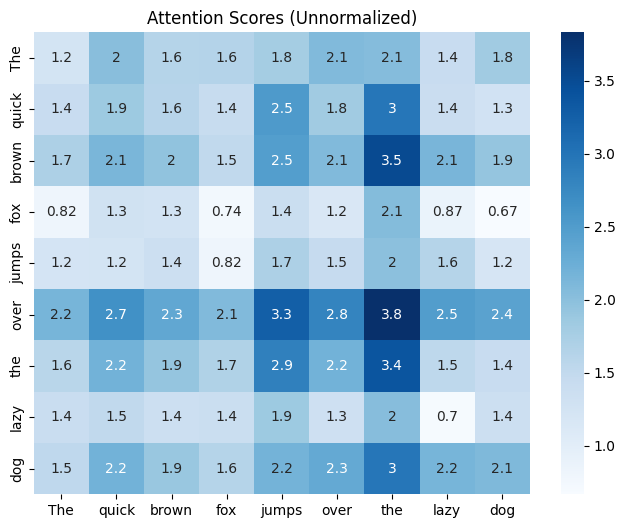


Attention Weights (Normalized):
[[0.0649603  0.14097386 0.09513092 0.0962967  0.11186254 0.15093988
  0.14565886 0.07780687 0.11637006]
 [0.06320994 0.09829347 0.07593214 0.06442417 0.1915264  0.09415612
  0.29589577 0.06203821 0.05452379]
 [0.05885862 0.08923788 0.07512877 0.04783554 0.12577816 0.08538936
  0.35486939 0.0901461  0.07275618]
 [0.07361459 0.11735404 0.11498152 0.06822643 0.12942735 0.10271431
  0.25341337 0.07709441 0.06317399]
 [0.08866187 0.08927452 0.10112266 0.05895083 0.14260771 0.11183878
  0.19019769 0.13121943 0.08612651]
 [0.05613566 0.09260771 0.06750129 0.0523784  0.17030753 0.10865208
  0.30088868 0.07853675 0.07299189]
 [0.05411926 0.09893017 0.07544053 0.05856149 0.19138597 0.09870773
  0.32544756 0.05138788 0.0460194 ]
 [0.1026908  0.11262224 0.09705325 0.09966979 0.15905596 0.09340541
  0.18825851 0.04995524 0.0972888 ]
 [0.05702391 0.11050129 0.08271419 0.0627042  0.11010125 0.12616635
  0.24258867 0.10738971 0.10081043]]


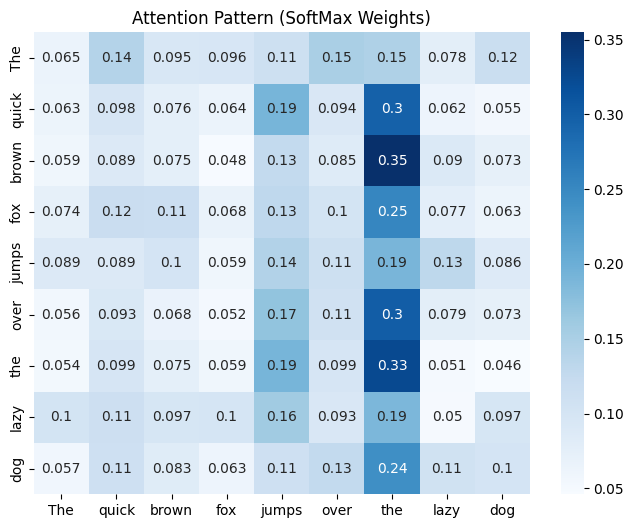


Attention Output:
[[0.75189652 0.64036919 0.59004332 0.42498186 0.56648238 0.50000759
  0.48756415 0.58826774]
 [0.78566239 0.69320642 0.5789829  0.49802843 0.55991402 0.44268553
  0.51471702 0.62248533]
 [0.78655753 0.68486043 0.58998074 0.51511933 0.54132252 0.42580021
  0.56306918 0.63904015]
 [0.7518591  0.66667328 0.58332144 0.49941385 0.54893998 0.45152459
  0.52856098 0.59860254]
 [0.76572739 0.68333354 0.55590034 0.47856466 0.58033763 0.46406185
  0.49576391 0.59498482]
 [0.79390654 0.68789271 0.57705716 0.48599073 0.5641369  0.44416951
  0.52159096 0.6267837 ]
 [0.790326   0.69307951 0.58274862 0.50304075 0.55415853 0.43837668
  0.52463996 0.62683936]
 [0.74879567 0.66566424 0.5798113  0.4752632  0.55342534 0.45844734
  0.47723213 0.58993995]
 [0.77443384 0.66366366 0.58428417 0.46323826 0.56280327 0.4668194
  0.52840629 0.61516231]]

Explanation:
- Each word is transformed into a Query (Q), Key (K), and Value (V) vector.
- Attention scores are computed by taking the dot prod

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from scipy.special import softmax

# Step 1: Define a sample sentence
sentence = "The quick brown fox jumps over the lazy dog"
words = sentence.split()

# Step 2: Create word embeddings (Random initialization for simplicity)
np.random.seed(42)  # For reproducibility
word_embeddings = {word: np.random.rand(8) for word in words}  # 8-d embeddings

# Explain embeddings
print("Word Embeddings:")
for word, embedding in word_embeddings.items():
    print(f"{word}: {embedding}")

# Step 3: Display embeddings as a matrix
embedding_matrix = np.array([word_embeddings[word] for word in words])
print("\nEmbedding Matrix:")
print(embedding_matrix)

# Visualize cosine similarity between embeddings
similarity_matrix = cosine_similarity(embedding_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, xticklabels=words, yticklabels=words, cmap="coolwarm")
plt.title("Cosine Similarity Between Word Embeddings")
plt.show()

# Step 4: Explain Q, K, and V in attention mechanism
# Randomly initialize Q, K, V for each word (dim=8)
Q = np.random.rand(len(words), 8)  # Queries
K = np.random.rand(len(words), 8)  # Keys
V = np.random.rand(len(words), 8)  # Values

print("\nQuery Matrix (Q):")
print(Q)
print("\nKey Matrix (K):")
print(K)
print("\nValue Matrix (V):")
print(V)

# Step 5: Compute attention pattern
attention_scores = np.dot(Q, K.T)  # Dot product Q and K.T
print("\nAttention Scores (Unnormalized):")
print(attention_scores)

plt.figure(figsize=(8, 6))
sns.heatmap(attention_scores, annot=True, xticklabels=words, yticklabels=words, cmap="Blues")
plt.title("Attention Scores (Unnormalized)")
plt.show()
# Step 6: Apply SoftMax to attention scores
attention_weights = softmax(attention_scores, axis=-1)
print("\nAttention Weights (Normalized):")
print(attention_weights)

# Step 7: Visualize attention patterns
plt.figure(figsize=(8, 6))
sns.heatmap(attention_weights, annot=True, xticklabels=words, yticklabels=words, cmap="Blues")
plt.title("Attention Pattern (SoftMax Weights)")
plt.show()

# Step 8: Compute attention output
attention_output = np.dot(attention_weights, V)
print("\nAttention Output:")
print(attention_output)

# Step 9: Explain attention mechanism
print("""
Explanation:
- Each word is transformed into a Query (Q), Key (K), and Value (V) vector.
- Attention scores are computed by taking the dot product of Q and K.T, which measures the similarity between words.
- SoftMax is applied to normalize the scores into probabilities.
- The output is computed by weighting the Value (V) vectors with the attention weights.
- This mechanism allows the model to focus on relevant words when processing a sentence.
""")


Introduction to Transformers and Attention Mechanisms
Rakshit Kalra
Rakshit Kalra

·
Follow

12 min read
·
Feb 7, 2024
200


3



Transformers and attention mechanisms have revolutionized the field of deep learning, offering a powerful way to process sequential data and capture long-range dependencies. In this article, we will put our serious hat on and truly explore the basics of transformers and the importance of attention mechanisms in enhancing model performance and coherence.

Key Takeaways
Attention mechanisms are crucial in transformers, allowing different tokens to be weighted based on their importance, enhancing model context and output quality.
Transformers operate on self-attention, enabling the capture of long-range dependencies without sequential processing.
Multi-head attention in transformers enhances model performance by allowing the model to focus on different aspects of the input data simultaneously.
Transformers outperform RNNs and LSTMs in handling sequential data due to their parallel processing capabilities.
Applications of transformers span across NLP, computer vision, and state-of-the-art model development.
Evolution of Transformers in Deep Learning

Importance of Attention Mechanisms
The advent of attention mechanisms has been nothing short of revolutionary in the realm of deep learning. Attention allows models to dynamically focus on pertinent parts of the input data, akin to the way humans pay attention to certain aspects of a visual scene or conversation. This selective focus is particularly crucial in tasks where context is key, such as language understanding or image recognition.

In the context of transformers, attention mechanisms serve to weigh the influence of different input tokens when producing an output. This is not merely a replication of human attention but an enhancement, enabling machines to surpass human performance in certain tasks. Consider the following points that underscore the importance of attention mechanisms:

They provide a means to handle variable-sized inputs by focusing on the most relevant parts.
Attention-based models can capture long-range dependencies that earlier models like RNNs struggled with.
They facilitate parallel processing of input data, leading to significant improvements in computational efficiency.
The elegance of attention mechanisms lies in their simplicity and power. By enabling models to consider the entire context of an input, they have opened up new possibilities in machine learning, leading to breakthroughs in natural language processing and beyond.

Encoder-Decoder Model
At the heart of the encoder-decoder model lies a symphony of sequential data translation, where the encoder processes the input sequence and distills it into a fixed-length representation, often referred to as the context vector. This vector serves as a condensed summary of the input, capturing its essence for the decoder to interpret.


The decoder, mirroring the encoder’s structure, awakens with the context vector, infusing its initial hidden state. It embarks on a generative quest, conjuring the first token of the output sequence, and continues to weave the subsequent tokens, each prediction delicately influenced by the previously materialized tokens and the persistent whisper of the context vector. This iterative dance persists until the narrative is complete, signaled by an end-of-sequence token or the bounds of a predefined sequence length.

The elegance of the encoder-decoder model is not without its challenges. When faced with lengthy and information-dense input sequences, the model’s ability to maintain relevance across the entire decoding process can wane. Not all fragments of the input’s context are equally pertinent at every juncture of text generation. For instance, in machine translation, the word ‘boy’ in the sentence ‘A boy is eating the banana’ does not necessitate the full breadth of the sentence’s context for accurate translation.

This realization has propelled the adoption of the Transformer architecture, which employs a specialized attention mechanism to judiciously allocate focus, ensuring that each decoding step is informed by the most relevant slices of context.

Transformer Architecture
The Transformer architecture, a groundbreaking innovation in the field of deep learning, has revolutionized our approach to sequence-to-sequence tasks. At its core, the Transformer consists of two primary components: an encoder and a decoder. Each component is designed to perform distinct yet complementary functions in the processing of input and generation of output.


The encoder’s role is to meticulously extract features from the input sequence. This is achieved through a series of layers, each comprising a multi-head attention mechanism followed by a feed-forward neural network. These layers are further enhanced with normalization and residual connections to ensure stability during training. Remarkably, the entire sequence is processed in parallel, which is a stark departure from the sequential processing of traditional recurrent neural networks (RNNs).

The decoder, on the other hand, is tasked with generating the output sequence. It mirrors the encoder’s structure but includes an additional layer of cross-attention that allows it to focus on relevant parts of the input sequence as it produces the output.

Important to note here that the Transformer’s architecture is not set in stone; it can manifest as Encoder-only, Decoder-only, or the classic Encoder-Decoder model. Each architectural variation is tailored to specific learning objectives and tasks. Below is a succinct representation of the architectural questions that guide the organization of the Transformer’s layers:

Q1: What is the architectural type (Encoder-only, Decoder-only, Encoder-Decoder)?
Q2: How are the Nx modules organized?
Q3: How does the proposed architectural design support the learning objective (task)?
The advantages of the Transformer architecture are manifold. Its parallel processing capabilities drastically accelerate training and inference times. Coupled with self-attention, the architecture adeptly handles long-range dependencies, capturing intricate relationships within the data that span considerable sequence lengths. This proficiency makes Transformers particularly adept at tasks where context and sequence relationships are important (everywhere?).

Key Components of Transformers
Self-Attention Mechanism
The self-attention mechanism is a pivotal innovation within the Transformer model (probably in human evolution as well?), enabling it to discern intricate relationships within data. It allows the model to weigh the significance of different parts of the input independently of their position in the sequence. This is particularly useful in scenarios where the context is essential for understanding the meaning, such as discerning whether ‘it’ refers to the ‘wolf’ or ‘rabbit’ in a given sentence.


To achieve this, the mechanism computes three vectors for each input element: a query, a key, and a value. The process involves a dot product between each query and key, followed by a normalization step using SoftMax, and finally, the resulting weights are applied to the value vectors, producing the attention vector. This vector is a representation that captures the contextual relationships within the input.

The elegance of self-attention lies in its ability to model relationships without regard to the distance between elements in the sequence. This characteristic is a stark departure from earlier sequence modeling approaches, which often struggled with long-range dependencies.

The following table summarizes the steps involved in the self-attention mechanism:


By isolating and processing these vectors, self-attention provides a nuanced understanding of the input, which is essential for the complex tasks that Transformers are often tasked with.

Multi-Head Attention

The ingenuity of the Multi-Head Attention mechanism lies in its ability to concurrently process data through multiple self-attention layers, each with a unique perspective. This parallel processing enables the model to capture a richer representation of the input. By dividing the attention process into ‘heads’, the mechanism can attend to different parts of the input sequence differently, akin to how a group of experts might analyze various aspects of a complex problem.

Consider the analogy of a team of detectives, each specializing in a different type of clue. One might focus on fingerprints, another on witness statements, and a third on the timeline of events. Together, they construct a comprehensive view of the case. Similarly, Multi-Head Attention combines the insights from multiple attention ‘experts’ to form a complete understanding of the input data.

The essence of Multi-Head Attention is to enhance the expressiveness of attention layers without increasing the parameter count significantly. It achieves this by running several attention computations in parallel and then merging their results.

The Transformer typically employs 8 such ‘heads’, though this number is not set in stone and can vary depending on the model’s complexity and the task at hand. Each head captures different features from the input sequence, and their collective output is concatenated and once again linearly transformed to produce the final attention output. This multi-faceted approach allows the model to be more discerning and nuanced in its understanding.

Feed-Forward Neural Networks
Within the Transformer’s architecture, nestled between the layers of self-attention, lie the Feed-Forward Neural Networks (FFNNs). These networks are pivotal in processing the information gleaned from the attention mechanisms. Each FFNN consists of two linear transformations with a ReLU activation in between, a design choice that allows for the introduction of non-linearity into the otherwise linear attention calculations.

The role of FFNNs is to independently process each position’s output from the attention layer, ensuring that while the self-attention mechanism captures the inter-token relationships, the FFNNs refine the token representations without altering their positions. This parallel processing capability is a stark contrast to the sequential nature of RNNs, which process inputs in a step-by-step fashion.

The beauty of FFNNs within Transformers is their simplicity and power. They are simple, consisting of just a few linear layers, yet they are capable of modeling complex relationships after the attention layers have done their part in highlighting the relevant information.

In summary, FFNNs are the unsung heroes of the Transformer model, providing depth and complexity to the learning process. They are the workhorses that apply the same transformation to different positions, allowing for the specialization of the model in various tasks, from language understanding to image recognition.

Comparison of Transformers with RNNs
Sequential vs. Parallel Processing
The advent of Transformers marked a paradigm shift in the way we approach sequence modeling. Transformers eschew the sequential dependency of RNNs, processing entire sequences in parallel. This architectural innovation leverages the full might of modern computing hardware, such as GPUs and TPUs, to accelerate training and inference times dramatically.

The parallel processing prowess of Transformers is not without its trade-offs. A notable one is the increased number of parameters, which demands more memory and computational resources.

While RNNs process data step-by-step, carrying forward a hidden state that encapsulates previous information, Transformers operate on the entire sequence at once. This allows for the simultaneous processing of data, which is a boon for efficiency but introduces challenges in interpretability. The table below succinctly contrasts the processing characteristics of RNNs and Transformers:


In essence, while RNNs have a natural advantage in tasks with strong temporal dependencies, Transformers excel in scenarios where the ability to process large sequences in parallel and capture long-range dependencies is important.

Long-Range Dependencies
One of the most salient features of Transformers is their innate ability to handle long-range dependencies with aplomb. This characteristic is crucial for understanding the context in sequences where relevant information may be separated by considerable distances. Traditional Recurrent Neural Networks (RNNs), including their more advanced variants like Long Short-Term Memory (LSTM) networks, often grapple with the vanishing gradient problem. This issue causes the influence of initial inputs to wane as the sequence progresses, making it arduous for these models to maintain context over long sequences.

Transformers, by contrast, are not constrained by sequence length. Their self-attention mechanism computes the relevance of all parts of the input sequence simultaneously, allowing for a global understanding of the data. This is a game-changer for tasks that require the synthesis of information spread across an entire sequence, such as document summarization or question answering.

The following list delineates the comparative advantages of Transformers over RNNs in handling long-range dependencies:

Transformers: Utilize self-attention to weigh the importance of each element in the sequence, regardless of distance.
RNNs: Sequential processing can lead to diminished influence from earlier elements, especially in longer sequences.
LSTMs: Incorporate gating mechanisms to better retain information over time, but still face challenges with very long sequences.
In essence, the Transformer architecture has redefined the landscape of sequence modeling by providing a robust solution to the long-standing challenge of long-range dependencies. This has opened up new vistas in the field of machine learning, particularly in complex tasks that require deep contextual understanding.

Applications of Transformers
NLP and Language Modeling
In the realm of Natural Language Processing (NLP), transformers have ushered in a new “epoch” of language modeling prowess. Transformers, with their attention mechanisms, have become the cornerstone of modern NLP, excelling in capturing context and relationships between words. This has led to significant advancements in various applications, from sentiment analysis to language translation, and the development of sophisticated chatbots and virtual assistants.

The self-attention mechanism within transformers allows for the nuanced understanding of language, enabling models to process words in relation to all other words in a sentence, rather than in isolation.

The table below showcases some of the pioneering models in NLP that have leveraged transformer architecture:


Despite their remarkable capabilities, transformers in NLP are not without challenges. Ambiguity and context understanding remain significant hurdles, as language is inherently nuanced and often context-dependent. (take my article, for instance! :D)

The continuous evolution of transformer models aims to address these complexities, pushing the boundaries of what machines can comprehend and how they interact with human language.

Computer Vision
The advent of Transformers in computer vision marks a paradigm shift from the conventional convolutional neural networks (CNNs) that dominated the field for years. Transformers introduce a novel approach to processing visual data, leveraging self-attention mechanisms to capture global dependencies within an image. This allows for a more nuanced understanding of the visual context, which is particularly beneficial for tasks such as object detection, image segmentation, and classification.

The hierarchical structure of vision transformers, such as the Swin Transformer, enables the model to focus on different scales of an image, enhancing the ability to discern fine details while maintaining a global perspective.

Recent advancements have seen Transformers being applied to a variety of medical imaging tasks, demonstrating their versatility and potential for improving diagnostic accuracy. For instance, vision transformers have been utilized for COVID-19 screening from radiography, lung cancer prognosis, and retina vessel segmentation. The table below encapsulates some of the key applications and their references:


The integration of Transformers into computer vision is not just a technical evolution; it is reshaping the landscape of possibilities within the field. As we continue to explore and refine these models, we can expect to see even more groundbreaking applications that push the boundaries of what machines can perceive and understand.

If you still haven’t connected the dots, when you use GPT-4 to help you fix your grill by showing a picture of it, you are asking it to use a kind of vision transformer to understand the image of your grill and help you accordingly.

Conclusion
In conclusion, the introduction to Transformers and Attention Mechanisms has shed light on the revolutionary advancements in modeling sequential data.

Transformers, with their self-attention mechanism, have surpassed traditional models like RNNs and LSTMs in various tasks, particularly in language modeling and text generation.

The importance of attention in Transformers cannot be overstated, as it enables the model to weigh the significance of different input tokens and capture long-range dependencies without sequential processing. As we delve deeper into the realm of NLP and Computer Vision, Transformers continue to play a pivotal role, showcasing their prowess in handling complex data structures with finesse and efficiency.

Frequently Asked Questions
What is the importance of attention mechanisms in Transformers?
Attention mechanisms are crucial in Transformers as they allow different tokens within the input to be weighted differently based on their importance. This ensures that context is considered, enhancing the quality and coherence of the output.

How do Transformers differ from RNNs and LSTMs in handling sequential data?
Transformers process entire sequences simultaneously using self-attention, unlike RNNs and LSTMs, which process data sequentially. This parallel processing capability contributes to their effectiveness.

What are the key components of Transformers?
Transformers consist of self-attention mechanisms, multi-head attention, and feed-forward neural networks in their architecture.

What are some applications of Transformers in deep learning?
Transformers are widely used in NLP, language modeling, computer vision, and for developing state-of-the-art models.

How do Transformers capture long-range dependencies in data processing?
Transformers utilize self-attention to weigh the importance of different input tokens, enabling them to capture long-range dependencies without the need for sequential processing.

What is the architecture of a Transformer network?
A Transformer network consists of encoder and decoder layers with multi-head self-attention mechanisms and feed-forward neural networks for processing sequential data effectively.

Word Embeddings:
The: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615]
quick: [0.60111501 0.70807258 0.02058449 0.96990985 0.83244264 0.21233911
 0.18182497 0.18340451]
brown: [0.30424224 0.52475643 0.43194502 0.29122914 0.61185289 0.13949386
 0.29214465 0.36636184]
fox: [0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041
 0.60754485 0.17052412]
jumps: [0.06505159 0.94888554 0.96563203 0.80839735 0.30461377 0.09767211
 0.68423303 0.44015249]
over: [0.12203823 0.49517691 0.03438852 0.9093204  0.25877998 0.66252228
 0.31171108 0.52006802]
the: [0.54671028 0.18485446 0.96958463 0.77513282 0.93949894 0.89482735
 0.59789998 0.92187424]
lazy: [0.0884925  0.19598286 0.04522729 0.32533033 0.38867729 0.27134903
 0.82873751 0.35675333]
dog: [0.28093451 0.54269608 0.14092422 0.80219698 0.07455064 0.98688694
 0.77224477 0.19871568]

Embedding Matrix:
[[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
  0.05808361 0.86617615]

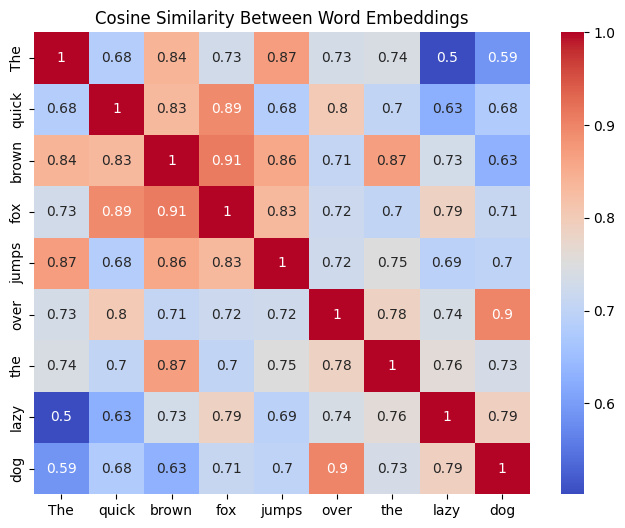


Query Matrix (Q):
[[0.00552212 0.81546143 0.70685734 0.72900717 0.77127035 0.07404465
  0.35846573 0.11586906]
 [0.86310343 0.62329813 0.33089802 0.06355835 0.31098232 0.32518332
  0.72960618 0.63755747]
 [0.88721274 0.47221493 0.11959425 0.71324479 0.76078505 0.5612772
  0.77096718 0.4937956 ]
 [0.52273283 0.42754102 0.02541913 0.10789143 0.03142919 0.63641041
  0.31435598 0.50857069]
 [0.90756647 0.24929223 0.41038292 0.75555114 0.22879817 0.07697991
  0.28975145 0.16122129]
 [0.92969765 0.80812038 0.63340376 0.87146059 0.80367208 0.18657006
  0.892559   0.53934224]
 [0.80744016 0.8960913  0.31800347 0.11005192 0.22793516 0.42710779
  0.81801477 0.86073058]
 [0.00695213 0.5107473  0.417411   0.22210781 0.11986537 0.33761517
  0.9429097  0.32320293]
 [0.51879062 0.70301896 0.3636296  0.97178208 0.96244729 0.2517823
  0.49724851 0.30087831]]

Key Matrix (K):
[[0.28484049 0.03688695 0.60956433 0.50267902 0.05147875 0.27864646
  0.90826589 0.23956189]
 [0.14489487 0.48945276 0.98565045 

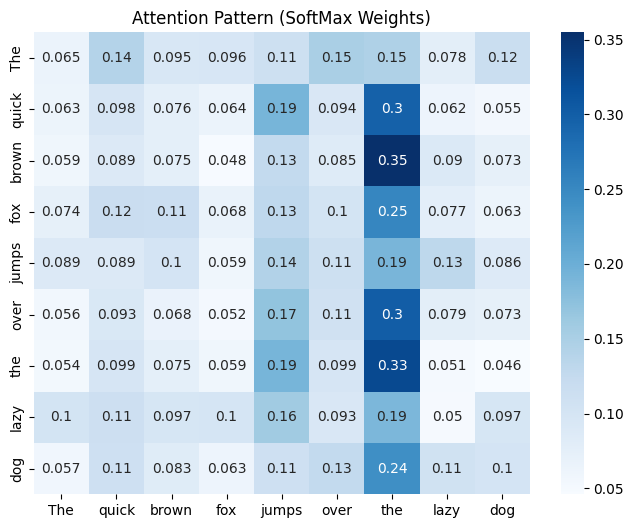


Attention Output:
[[0.75189652 0.64036919 0.59004332 0.42498186 0.56648238 0.50000759
  0.48756415 0.58826774]
 [0.78566239 0.69320642 0.5789829  0.49802843 0.55991402 0.44268553
  0.51471702 0.62248533]
 [0.78655753 0.68486043 0.58998074 0.51511933 0.54132252 0.42580021
  0.56306918 0.63904015]
 [0.7518591  0.66667328 0.58332144 0.49941385 0.54893998 0.45152459
  0.52856098 0.59860254]
 [0.76572739 0.68333354 0.55590034 0.47856466 0.58033763 0.46406185
  0.49576391 0.59498482]
 [0.79390654 0.68789271 0.57705716 0.48599073 0.5641369  0.44416951
  0.52159096 0.6267837 ]
 [0.790326   0.69307951 0.58274862 0.50304075 0.55415853 0.43837668
  0.52463996 0.62683936]
 [0.74879567 0.66566424 0.5798113  0.4752632  0.55342534 0.45844734
  0.47723213 0.58993995]
 [0.77443384 0.66366366 0.58428417 0.46323826 0.56280327 0.4668194
  0.52840629 0.61516231]]

Explanation:
- Each word is transformed into a Query (Q), Key (K), and Value (V) vector.
- Attention scores are computed by taking the dot prod

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from scipy.special import softmax

# Step 1: Define a sample sentence
sentence = "The quick brown fox jumps over the lazy dog"
words = sentence.split()

# Step 2: Create word embeddings (Random initialization for simplicity)
np.random.seed(42)  # For reproducibility
word_embeddings = {word: np.random.rand(8) for word in words}  # 8-d embeddings

# Explain embeddings
print("Word Embeddings:")
for word, embedding in word_embeddings.items():
    print(f"{word}: {embedding}")

# Step 3: Display embeddings as a matrix
embedding_matrix = np.array([word_embeddings[word] for word in words])
print("\nEmbedding Matrix:")
print(embedding_matrix)

# Visualize cosine similarity between embeddings
similarity_matrix = cosine_similarity(embedding_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, xticklabels=words, yticklabels=words, cmap="coolwarm")
plt.title("Cosine Similarity Between Word Embeddings")
plt.show()

# Step 4: Explain Q, K, and V in attention mechanism
# Randomly initialize Q, K, V for each word (dim=8)
Q = np.random.rand(len(words), 8)  # Queries
K = np.random.rand(len(words), 8)  # Keys
V = np.random.rand(len(words), 8)  # Values

print("\nQuery Matrix (Q):")
print(Q)
print("\nKey Matrix (K):")
print(K)
print("\nValue Matrix (V):")
print(V)

# Step 5: Compute attention pattern
attention_scores = np.dot(Q, K.T)  # Dot product Q and K.T
# Explanation: The dot product of Q and K.T measures the alignment or relevance between the Query (Q) of a word and the Key (K) of another word. A higher score indicates that a word is more relevant or similar in context to another word, which is essential for determining attention weights.
# Formula: Attention_Score[i][j] = Q[i] . K[j]^T
print("\nAttention Scores (Unnormalized):")
print(attention_scores)

# Step 6: Apply SoftMax to attention scores
attention_weights = softmax(attention_scores, axis=-1)
# Explanation: SoftMax normalizes the attention scores into probabilities, ensuring they sum to 1 for each word.
# Formula: Attention_Weights[i][j] = exp(Attention_Score[i][j]) / sum(exp(Attention_Score[i]))
print("\nAttention Weights (Normalized):")
print(attention_weights)

# Step 7: Visualize attention patterns
plt.figure(figsize=(8, 6))
sns.heatmap(attention_weights, annot=True, xticklabels=words, yticklabels=words, cmap="Blues")
plt.title("Attention Pattern (SoftMax Weights)")
plt.show()

# Step 8: Compute attention output
attention_output = np.dot(attention_weights, V)
# Explanation: The final output is computed by weighting the Value (V) vectors with the attention weights.
# Formula: Output[i] = sum(Attention_Weights[i][j] * V[j] for all j)
print("\nAttention Output:")
print(attention_output)

# Step 9: Explain attention mechanism
print("""
Explanation:
- Each word is transformed into a Query (Q), Key (K), and Value (V) vector.
- Attention scores are computed by taking the dot product of Q and K.T, which measures the similarity between words.
  Formula: Attention_Score[i][j] = Q[i] . K[j]^T
- SoftMax is applied to normalize the scores into probabilities.
  Formula: Attention_Weights[i][j] = exp(Attention_Score[i][j]) / sum(exp(Attention_Score[i]))
- The output is computed by weighting the Value (V) vectors with the attention weights.
  Formula: Output[i] = sum(Attention_Weights[i][j] * V[j] for all j)
- This mechanism allows the model to focus on relevant words when processing a sentence.
""")


https://medium.com/@kalra.rakshit/introduction-to-transformers-and-attention-mechanisms-c29d252ea2c5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from scipy.special import softmax

# Step 1: Define a sample sentence
sentence = "The quick brown fox jumps over the lazy dog"
words = sentence.split()

# Step 2: Create word embeddings (Random initialization for simplicity)
np.random.seed(42)  # For reproducibility
word_embeddings = {word: np.random.rand(8) for word in words}  # 8-d embeddings

# Explain embeddings
print("Word Embeddings:")
for word, embedding in word_embeddings.items():
    print(f"{word}: {embedding}")

# Step 3: Display embeddings as a matrix
embedding_matrix = np.array([word_embeddings[word] for word in words])
print("\nEmbedding Matrix:")
print(embedding_matrix)

# Visualize cosine similarity between embeddings
similarity_matrix = cosine_similarity(embedding_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, xticklabels=words, yticklabels=words, cmap="coolwarm")
plt.title("Cosine Similarity Between Word Embeddings")
plt.show()

# Step 4: Multi-Head Attention Mechanism
# Define number of heads
num_heads = 4
head_dim = 8 // num_heads  # Assume 8-d embeddings split across heads

# Initialize Q, K, V for each head
Q_heads = [np.random.rand(len(words), head_dim) for _ in range(num_heads)]
K_heads = [np.random.rand(len(words), head_dim) for _ in range(num_heads)]
V_heads = [np.random.rand(len(words), head_dim) for _ in range(num_heads)]

# Perform attention for each head
attention_outputs = []
for i in range(num_heads):
    Q, K, V = Q_heads[i], K_heads[i], V_heads[i]
    attention_scores = np.dot(Q, K.T)  # Dot product Q and K.T
    # Formula: Attention_Score[i][j] = Q[i] . K[j]^T
    attention_weights = softmax(attention_scores, axis=-1)  # Normalize with SoftMax
    # Formula: Attention_Weights[i][j] = exp(Attention_Score[i][j]) / sum(exp(Attention_Score[i]))
    attention_output = np.dot(attention_weights, V)  # Weighted sum of values
    # Formula: Output[i] = sum(Attention_Weights[i][j] * V[j] for all j)
    attention_outputs.append(attention_output)

# Concatenate outputs of all heads
multi_head_output = np.concatenate(attention_outputs, axis=-1)

# Print results
print("\nMulti-Head Attention Output:")
print(multi_head_output)

# Step 5: Visualize attention weights for one head
plt.figure(figsize=(8, 6))
sns.heatmap(attention_weights, annot=True, xticklabels=words, yticklabels=words, cmap="Blues")
plt.title("Attention Pattern (SoftMax Weights for One Head)")
plt.show()

# Step 6: Explanation
print("""
Explanation of Multi-Head Attention:
- Multi-head attention uses multiple sets of Q, K, and V matrices (one per head).
- Each head captures different relationships in the data.
- Attention is computed independently for each head, and their outputs are concatenated.
- This mechanism allows the model to focus on diverse aspects of the input simultaneously.

Formulas:
1. Attention_Score[i][j] = Q[i] . K[j]^T
2. Attention_Weights[i][j] = exp(Attention_Score[i][j]) / sum(exp(Attention_Score[i]))
3. Output[i] = sum(Attention_Weights[i][j] * V[j] for all j)
""")


Word Embeddings:
The: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615]
quick: [0.60111501 0.70807258 0.02058449 0.96990985 0.83244264 0.21233911
 0.18182497 0.18340451]
brown: [0.30424224 0.52475643 0.43194502 0.29122914 0.61185289 0.13949386
 0.29214465 0.36636184]
fox: [0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041
 0.60754485 0.17052412]
jumps: [0.06505159 0.94888554 0.96563203 0.80839735 0.30461377 0.09767211
 0.68423303 0.44015249]
over: [0.12203823 0.49517691 0.03438852 0.9093204  0.25877998 0.66252228
 0.31171108 0.52006802]
the: [0.80744016 0.8960913  0.31800347 0.11005192 0.22793516 0.42710779
 0.81801477 0.86073058]
lazy: [0.0884925  0.19598286 0.04522729 0.32533033 0.38867729 0.27134903
 0.82873751 0.35675333]
dog: [0.28093451 0.54269608 0.14092422 0.80219698 0.07455064 0.98688694
 0.77224477 0.19871568]
A: [0.00552212 0.81546143 0.70685734 0.72900717 0.77127035 0.07404465
 0.35846573 0.11586906]
fast: [0.86310343

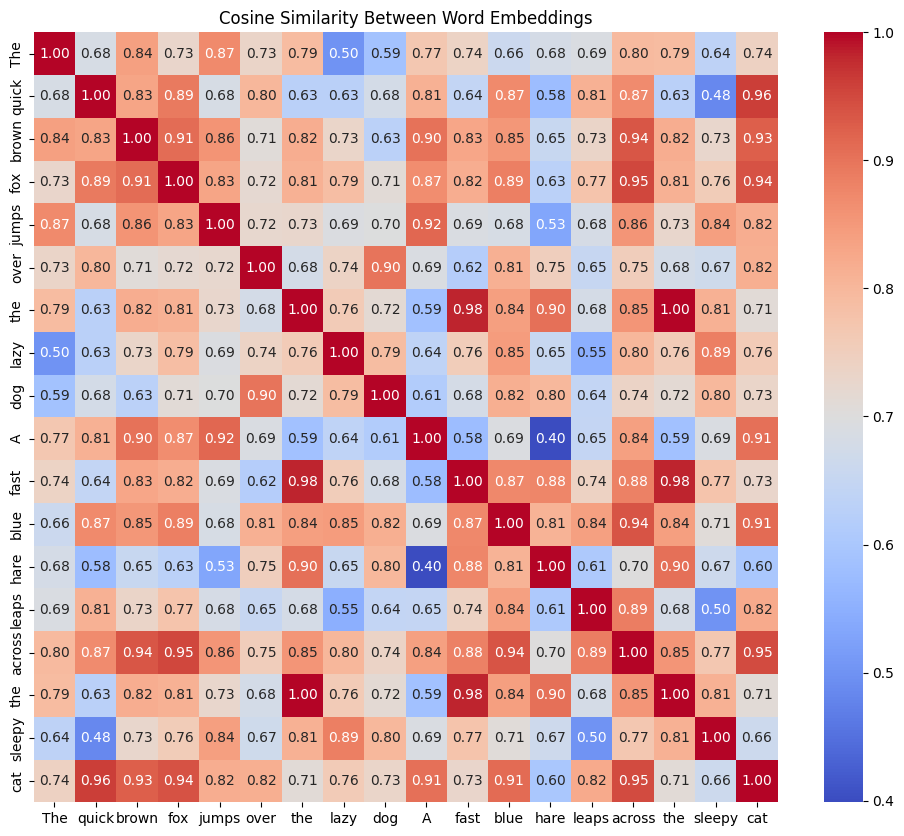


Multi-Head Attention Output:
[[0.41770052 0.54883353 0.45326419 0.66683643 0.67000576 0.53161498
  0.50178738 0.5156121 ]
 [0.41960628 0.52973286 0.44289621 0.69268535 0.66975404 0.53811927
  0.52027219 0.52539397]
 [0.42716491 0.53695772 0.45699623 0.67679767 0.67608378 0.54538499
  0.4947168  0.51401055]
 [0.40762709 0.5444266  0.44452434 0.68438818 0.67576069 0.53372335
  0.51234014 0.5204951 ]
 [0.42899976 0.52812584 0.4497743  0.67272035 0.67932305 0.54131203
  0.50206911 0.51987168]
 [0.40575563 0.54487609 0.46189137 0.67847469 0.68241419 0.55882358
  0.52150419 0.52573665]
 [0.42229842 0.51698406 0.44292474 0.68750384 0.67643319 0.55058926
  0.49602291 0.51506281]
 [0.43071584 0.51734553 0.45404529 0.67189105 0.67856085 0.55096421
  0.50208743 0.51799054]
 [0.42684519 0.52236729 0.44734553 0.68933297 0.67708141 0.54486557
  0.51651545 0.52299891]
 [0.41963014 0.52822685 0.44350508 0.69013916 0.66970572 0.52858603
  0.49741861 0.51630822]
 [0.43460778 0.51193885 0.44719596 0.671

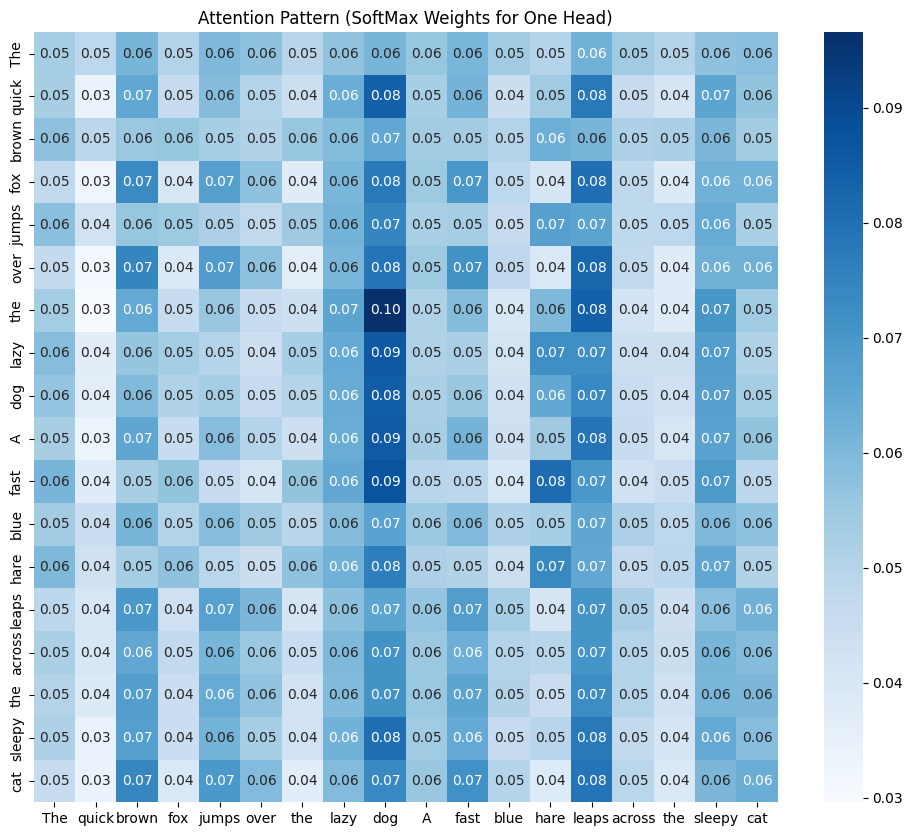


Explanation of Multi-Head Attention:
- Multi-head attention uses multiple sets of Q, K, and V matrices (one per head).
- Each head captures different relationships in the data.
- Attention is computed independently for each head, and their outputs are concatenated.
- This mechanism allows the model to focus on diverse aspects of the input simultaneously.

Formulas:
1. Attention_Score[i][j] = Q[i] . K[j]^T
2. Attention_Weights[i][j] = exp(Attention_Score[i][j]) / sum(exp(Attention_Score[i]))
3. Output[i] = sum(Attention_Weights[i][j] * V[j] for all j)



In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from scipy.special import softmax

# Step 1: Define multiple sample sentences
sentences = [
    "The quick brown fox jumps over the lazy dog",
    "A fast blue hare leaps across the sleepy cat"
]

# Tokenize words from sentences
words = [word for sentence in sentences for word in sentence.split()]

# Step 2: Create word embeddings (Random initialization for simplicity)
np.random.seed(42)  # For reproducibility
word_embeddings = {word: np.random.rand(8) for word in words}  # 8-d embeddings

# Explain embeddings
print("Word Embeddings:")
for word, embedding in word_embeddings.items():
    print(f"{word}: {embedding}")

# Step 3: Display embeddings as a matrix
embedding_matrix = np.array([word_embeddings[word] for word in words])
print("\nEmbedding Matrix:")
print(embedding_matrix)

# Visualize cosine similarity between embeddings
similarity_matrix = cosine_similarity(embedding_matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", xticklabels=words, yticklabels=words, cmap="coolwarm")
plt.title("Cosine Similarity Between Word Embeddings")
plt.show()

# Step 4: Multi-Head Attention Mechanism
# Define number of heads
num_heads = 4
head_dim = 8 // num_heads  # Assume 8-d embeddings split across heads

# Initialize Q, K, V for each head
Q_heads = [np.random.rand(len(words), head_dim) for _ in range(num_heads)]
K_heads = [np.random.rand(len(words), head_dim) for _ in range(num_heads)]
V_heads = [np.random.rand(len(words), head_dim) for _ in range(num_heads)]

# Perform attention for each head
attention_outputs = []
attention_weights_list = []  # To store weights for visualization
for i in range(num_heads):
    Q, K, V = Q_heads[i], K_heads[i], V_heads[i]
    attention_scores = np.dot(Q, K.T)  # Dot product Q and K.T
    # Formula: Attention_Score[i][j] = Q[i] . K[j]^T
    attention_weights = softmax(attention_scores, axis=-1)  # Normalize with SoftMax
    # Formula: Attention_Weights[i][j] = exp(Attention_Score[i][j]) / sum(exp(Attention_Score[i]))
    attention_weights_list.append(attention_weights)
    attention_output = np.dot(attention_weights, V)  # Weighted sum of values
    # Formula: Output[i] = sum(Attention_Weights[i][j] * V[j] for all j)
    attention_outputs.append(attention_output)

# Concatenate outputs of all heads
multi_head_output = np.concatenate(attention_outputs, axis=-1)

# Print results
print("\nMulti-Head Attention Output:")
print(multi_head_output)

# Step 5: Visualize attention weights for one head
plt.figure(figsize=(12, 10))
sns.heatmap(attention_weights_list[0], annot=True, fmt=".2f", xticklabels=words, yticklabels=words, cmap="Blues")
plt.title("Attention Pattern (SoftMax Weights for One Head)")
plt.show()

# Step 6: Explanation
print("""
Explanation of Multi-Head Attention:
- Multi-head attention uses multiple sets of Q, K, and V matrices (one per head).
- Each head captures different relationships in the data.
- Attention is computed independently for each head, and their outputs are concatenated.
- This mechanism allows the model to focus on diverse aspects of the input simultaneously.

Formulas:
1. Attention_Score[i][j] = Q[i] . K[j]^T
2. Attention_Weights[i][j] = exp(Attention_Score[i][j]) / sum(exp(Attention_Score[i]))
3. Output[i] = sum(Attention_Weights[i][j] * V[j] for all j)
""")


Word Embeddings:
The: [0.54671028 0.18485446 0.96958463 0.77513282 0.93949894 0.89482735
 0.59789998 0.92187424]
cat: [0.60111501 0.70807258 0.02058449 0.96990985 0.83244264 0.21233911
 0.18182497 0.18340451]
sat: [0.30424224 0.52475643 0.43194502 0.29122914 0.61185289 0.13949386
 0.29214465 0.36636184]
on: [0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041
 0.60754485 0.17052412]
the: [0.86310343 0.62329813 0.33089802 0.06355835 0.31098232 0.32518332
 0.72960618 0.63755747]
mat: [0.88721274 0.47221493 0.11959425 0.71324479 0.76078505 0.5612772
 0.77096718 0.4937956 ]
dog: [0.0884925  0.19598286 0.04522729 0.32533033 0.38867729 0.27134903
 0.82873751 0.35675333]
lay: [0.28093451 0.54269608 0.14092422 0.80219698 0.07455064 0.98688694
 0.77224477 0.19871568]
beside: [0.00552212 0.81546143 0.70685734 0.72900717 0.77127035 0.07404465
 0.35846573 0.11586906]

Embedding Matrix:
[[0.54671028 0.18485446 0.96958463 0.77513282 0.93949894 0.89482735
  0.59789998 0.92187424]
 [0.60

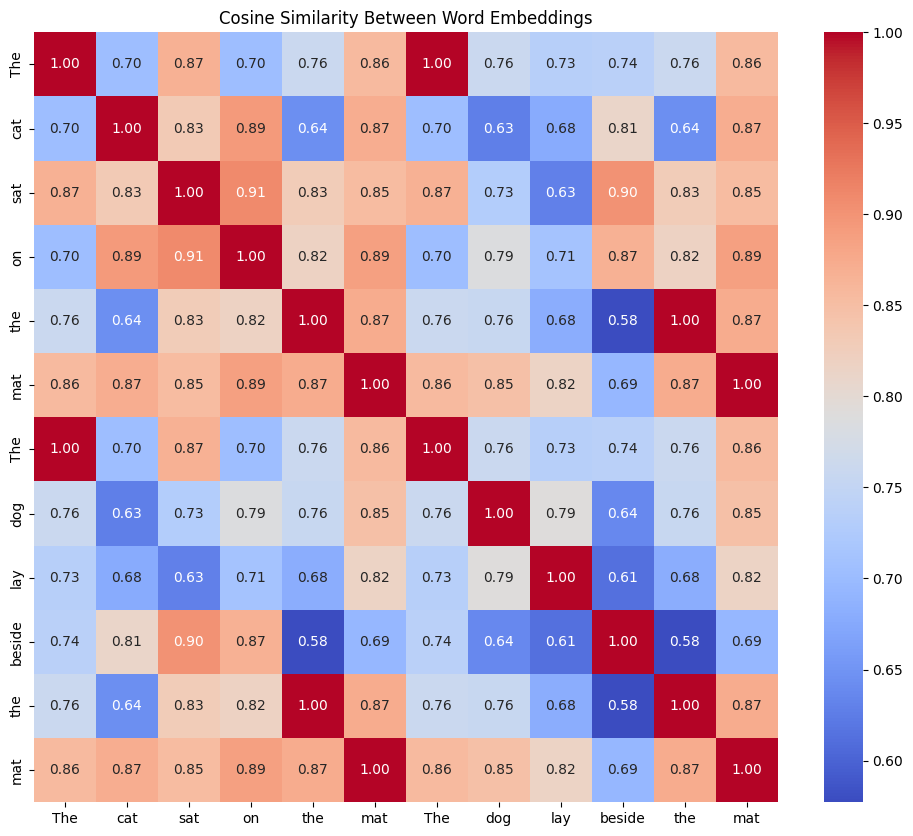


Multi-Head Attention Output:
[[0.47070707 0.37926576 0.48588566 0.49916404 0.46531125 0.48238568
  0.45352964 0.45861276]
 [0.47765728 0.38469787 0.43545759 0.46830359 0.46619043 0.48605474
  0.45953223 0.45321359]
 [0.48188665 0.38160879 0.44069334 0.48385488 0.46640303 0.48773452
  0.45652786 0.45524979]
 [0.47527013 0.38020526 0.4854415  0.49752461 0.46710482 0.47946895
  0.45633373 0.45456871]
 [0.46259523 0.37779491 0.43139876 0.48991534 0.46553081 0.48963146
  0.45115577 0.45611379]
 [0.47549046 0.37943176 0.44439489 0.47266564 0.46763746 0.47886363
  0.45448115 0.45354771]
 [0.47370692 0.38207809 0.4321649  0.4806878  0.46633191 0.48976016
  0.46103467 0.45464074]
 [0.47316032 0.38116841 0.47575863 0.47290795 0.46447514 0.49221468
  0.43864393 0.45882067]
 [0.46566187 0.38034542 0.46467346 0.49359804 0.46513113 0.48986596
  0.44937773 0.45883011]
 [0.47207044 0.37949772 0.46390445 0.5072823  0.46631047 0.48639015
  0.44634843 0.45703853]
 [0.46410909 0.37776496 0.47448622 0.469

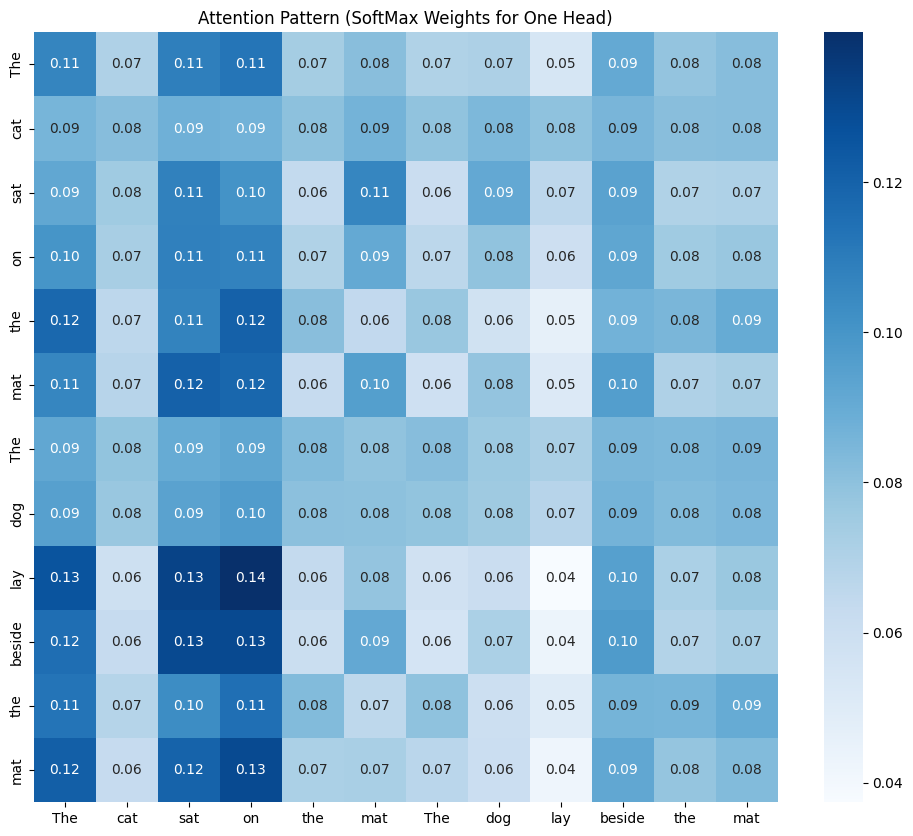


Explanation of Multi-Head Attention:
- Multi-head attention uses multiple sets of Q, K, and V matrices (one per head).
- Each head captures different relationships in the data.
- Attention is computed independently for each head, and their outputs are concatenated.
- This mechanism allows the model to focus on diverse aspects of the input simultaneously.

Formulas:
1. Attention_Score[i][j] = Q[i] . K[j]^T
2. Attention_Weights[i][j] = exp(Attention_Score[i][j]) / sum(exp(Attention_Score[i]))
3. Output[i] = sum(Attention_Weights[i][j] * V[j] for all j)



In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from scipy.special import softmax

# Step 1: Define multiple related sample sentences
sentences = [
    "The cat sat on the mat",
    "The dog lay beside the mat"
]

# Tokenize words from sentences
words = [word for sentence in sentences for word in sentence.split()]

# Step 2: Create word embeddings (Random initialization for simplicity)
np.random.seed(42)  # For reproducibility
word_embeddings = {word: np.random.rand(8) for word in words}  # 8-d embeddings

# Explain embeddings
print("Word Embeddings:")
for word, embedding in word_embeddings.items():
    print(f"{word}: {embedding}")

# Step 3: Display embeddings as a matrix
embedding_matrix = np.array([word_embeddings[word] for word in words])
print("\nEmbedding Matrix:")
print(embedding_matrix)

# Visualize cosine similarity between embeddings
similarity_matrix = cosine_similarity(embedding_matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", xticklabels=words, yticklabels=words, cmap="coolwarm")
plt.title("Cosine Similarity Between Word Embeddings")
plt.show()

# Step 4: Multi-Head Attention Mechanism
# Define number of heads
num_heads = 4
head_dim = 8 // num_heads  # Assume 8-d embeddings split across heads

# Initialize Q, K, V for each head
Q_heads = [np.random.rand(len(words), head_dim) for _ in range(num_heads)]
K_heads = [np.random.rand(len(words), head_dim) for _ in range(num_heads)]
V_heads = [np.random.rand(len(words), head_dim) for _ in range(num_heads)]

# Perform attention for each head
attention_outputs = []
attention_weights_list = []  # To store weights for visualization
for i in range(num_heads):
    Q, K, V = Q_heads[i], K_heads[i], V_heads[i]
    attention_scores = np.dot(Q, K.T)  # Dot product Q and K.T
    # Formula: Attention_Score[i][j] = Q[i] . K[j]^T
    attention_weights = softmax(attention_scores, axis=-1)  # Normalize with SoftMax
    # Formula: Attention_Weights[i][j] = exp(Attention_Score[i][j]) / sum(exp(Attention_Score[i]))
    attention_weights_list.append(attention_weights)
    attention_output = np.dot(attention_weights, V)  # Weighted sum of values
    # Formula: Output[i] = sum(Attention_Weights[i][j] * V[j] for all j)
    attention_outputs.append(attention_output)

# Concatenate outputs of all heads
multi_head_output = np.concatenate(attention_outputs, axis=-1)

# Print results
print("\nMulti-Head Attention Output:")
print(multi_head_output)

# Step 5: Visualize attention weights for one head
plt.figure(figsize=(12, 10))
sns.heatmap(attention_weights_list[0], annot=True, fmt=".2f", xticklabels=words, yticklabels=words, cmap="Blues")
plt.title("Attention Pattern (SoftMax Weights for One Head)")
plt.show()

# Step 6: Explanation
print("""
Explanation of Multi-Head Attention:
- Multi-head attention uses multiple sets of Q, K, and V matrices (one per head).
- Each head captures different relationships in the data.
- Attention is computed independently for each head, and their outputs are concatenated.
- This mechanism allows the model to focus on diverse aspects of the input simultaneously.

Formulas:
1. Attention_Score[i][j] = Q[i] . K[j]^T
2. Attention_Weights[i][j] = exp(Attention_Score[i][j]) / sum(exp(Attention_Score[i]))
3. Output[i] = sum(Attention_Weights[i][j] * V[j] for all j)
""")
